In [1]:
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Question
Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

performer: who performed the song
song: the title of the song
year: year (1958 to 2021)
week: chart week of that year (1, 2, etc)
week_position: what position that song occupied that week on the Billboard top 100 chart.
Use your skills in data wrangling and plotting to answer the following three questions.

In [2]:
data = pd.read_csv("billboard.csv")
data.head()

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33


### Part A
Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

In [3]:
# Group by performer and song, and calculate the count of weeks each song appeared in the Billboard Top 100
top_songs = data.groupby(['performer', 'song']).size().reset_index(name='count')

# Sort the table in descending order of the count variable
top_songs = top_songs.sort_values(by='count', ascending=False)

# Select the top 10 songs
top_10_songs = top_songs.head(10)

# Print the table
print("Top 10 Most Popular Songs Since 1958:")
print(top_10_songs)

Top 10 Most Popular Songs Since 1958:
                                       performer  \
11194                            Imagine Dragons   
403                                   AWOLNATION   
27121                                 The Weeknd   
12026                                 Jason Mraz   
15008                                LeAnn Rimes   
18752                                OneRepublic   
14807  LMFAO Featuring Lauren Bennett & GoonRock   
12421                                      Jewel   
506                                        Adele   
4347                            Carrie Underwood   

                                      song  count  
11194                          Radioactive     87  
403                                   Sail     79  
27121                      Blinding Lights     76  
12026                            I'm Yours     76  
15008                        How Do I Live     69  
18752                       Counting Stars     68  
14807                    

### Part B
Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

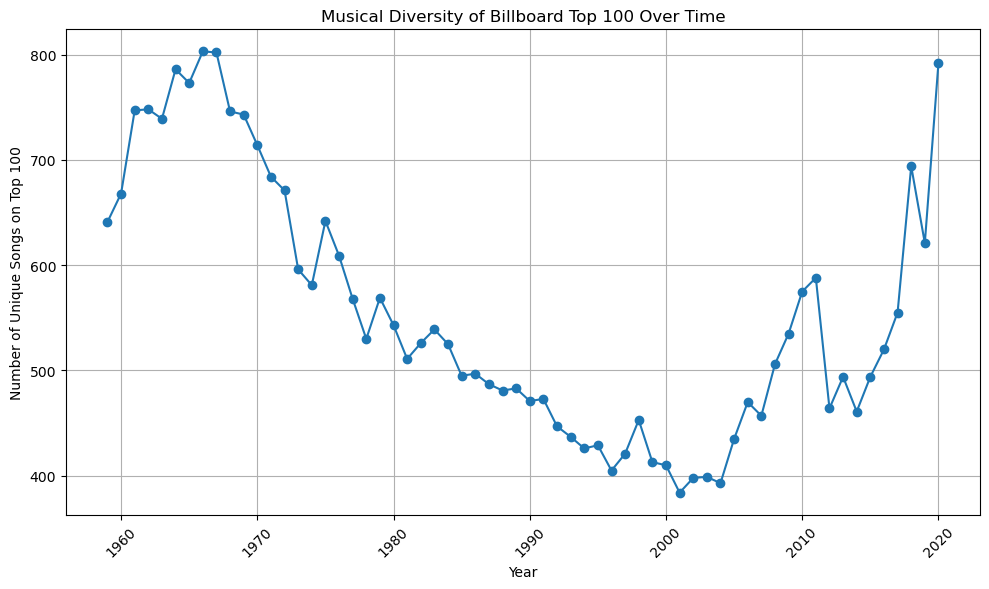

In [4]:
# Filter the data to exclude years 1958 and 2021
data_filtered = data[(data['year'] > 1958) & (data['year'] < 2021)]

# Group by year, performer, and song, and calculate the count of weeks each song appeared on the Billboard Top 100 in a given year
songs_per_year = data_filtered.groupby(['year', 'performer', 'song']).size().reset_index(name='count')

# Group by year and calculate the number of unique songs that appeared on the Billboard Top 100 in each year
unique_songs_per_year = songs_per_year.groupby('year')['song'].nunique().reset_index(name='unique_songs')

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(unique_songs_per_year['year'], unique_songs_per_year['unique_songs'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs on Top 100')
plt.title('Musical Diversity of Billboard Top 100 Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation - 
The data indicates that the count of distinct songs on the Billboard top 100 began to decline from 1968 onwards, reaching its lowest around 2001. From that point, there was a resurgence in variety, with numbers rising until 2019.

### Part C
Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

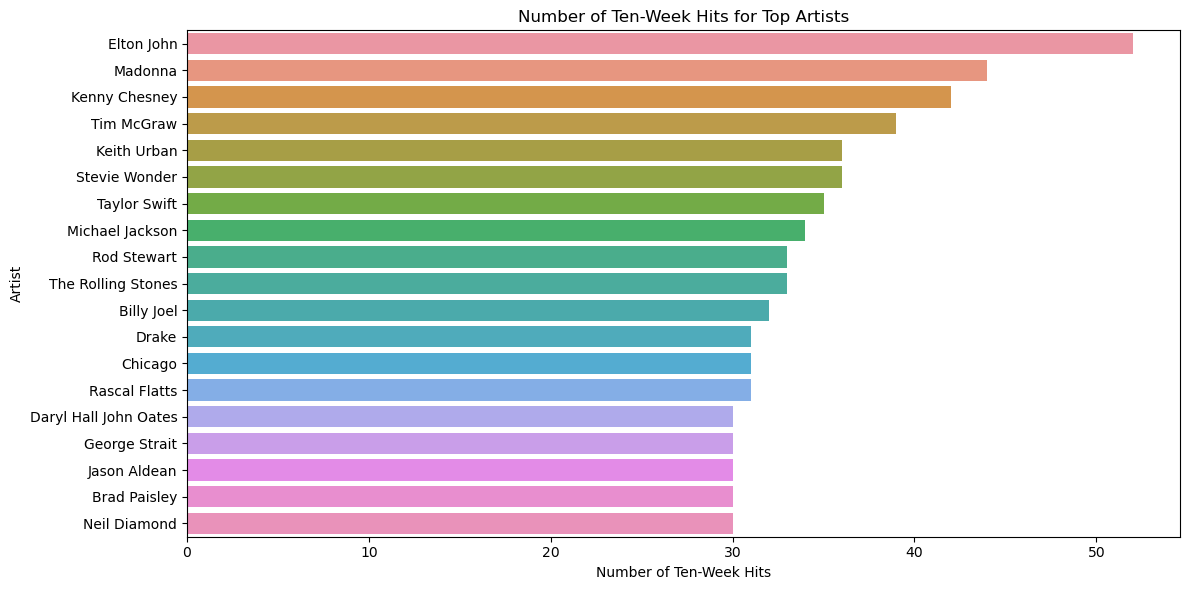

In [5]:
# Group by performer and song, and calculate the count of weeks each song appeared on the Billboard Top 100
songs_per_artist = data.groupby(['performer', 'song']).size().reset_index(name='weeks_on_chart')

# Filter songs that had at least ten weeks on the chart
ten_week_hits = songs_per_artist[songs_per_artist['weeks_on_chart'] >= 10]

# Group by artist and count the number of ten-week hits for each artist
artists_with_ten_week_hits = ten_week_hits.groupby('performer').size().reset_index(name='num_ten_week_hits')

# Filter artists with at least 30 ten-week hits
top_artists = artists_with_ten_week_hits[artists_with_ten_week_hits['num_ten_week_hits'] >= 30]

# Sort the artists in descending order of the number of ten-week hits
top_artists = top_artists.sort_values(by='num_ten_week_hits', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='num_ten_week_hits', y='performer', data=top_artists)
plt.xlabel('Number of Ten-Week Hits')
plt.ylabel('Artist')
plt.title('Number of Ten-Week Hits for Top Artists')
plt.tight_layout()
plt.show()